In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import matplotlib.cm as cm
import networkx.algorithms.community as nxcom
from community import community_louvain

In [2]:
raw0 = pd.read_csv(open(r'id2000.csv'), header = 0, index_col=0)
raw0.head()

,id2,lat,long,id,num_road
0,2001,116.42769,39.94485,HI7000d,4
1,2002,116.42764,39.94330,HI7001a,3
2,2003,116.42782,39.93705,HI7002a,2
3,2005,116.42832,39.92993,HI7039a,3
4,2006,116.42785,39.92513,HI7003a,3


In [3]:
nodes = np.asarray(raw0.id2)

In [36]:
relation = pd.read_csv('edges_all.csv', header = None)
relation.head()

,0,1
0,2001,2002
1,2002,2003
2,2003,2005
3,2005,2006
4,2006,2007


In [37]:
relation = np.asarray(relation)
# relation

In [38]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(relation)

In [39]:
print('We have %d nodes.' % G.number_of_nodes())
print('We have %d edges.' % G.number_of_edges())

We have 207 nodes.
We have 240 edges.


In [40]:
# plt.figure(figsize = (10,10))

# nx.draw_networkx(G)

In [41]:
pos0 = raw0.iloc[:,1:3]
pos0 = np.asarray(pos0)

In [42]:
vnode= pos0
npos = dict(zip(nodes, vnode))  # 获取节点与坐标之间的映射关系，用字典表示
 # 若显示多个图，可将所有节点放入该列表中
# pos = {} 
# pos.update(npos)
# nlabels = dict(zip(nodes, nodes))  # 标志字典，构建节点与标识点之间的关系


In [43]:
# relation.reshape()

In [44]:
# G.edges()

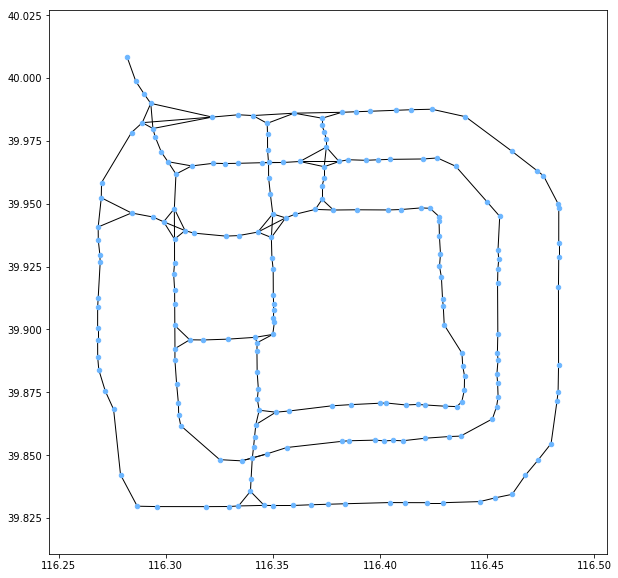

In [45]:
plt.figure(figsize = (10,10))

nx.draw_networkx(G, pos = npos, node_size=20, node_color="#6CB6FF", with_labels=False)
plt.show()

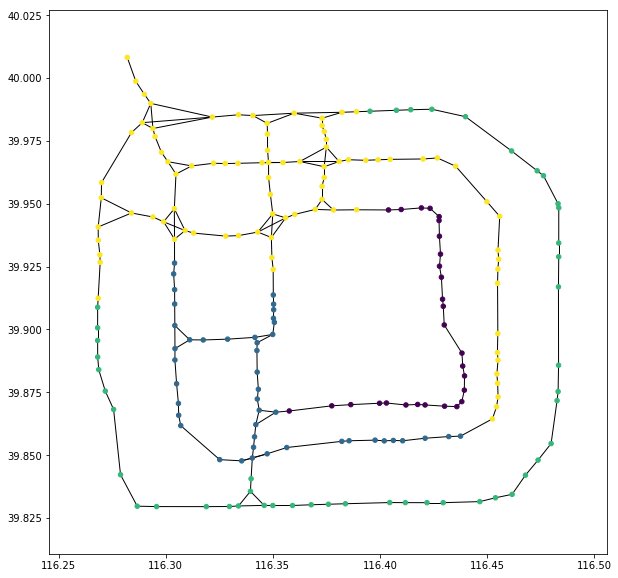

In [49]:
partition = community_louvain.best_partition(G,resolution=10)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

plt.figure(figsize = (10,10))
nx.draw_networkx(G, pos = npos, node_size=20, node_color=list(partition.values()), with_labels=False)
plt.show()

In [57]:
partition_results = pd.DataFrame(data = list(partition.values()))

In [60]:
partition_results

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [59]:
partition_results.to_csv('partition_results1.csv', index=False)

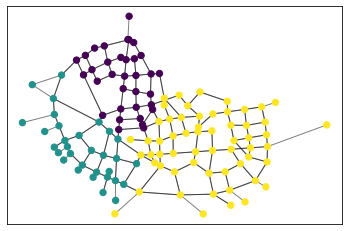

In [45]:
# compute the best partition
partition = community_louvain.best_partition(G,resolution=6)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, npos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, npos, relation, alpha=0.5)
plt.show()